In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from tempfile import NamedTemporaryFile
import matplotlib.animation as animation
from matplotlib.colors import LogNorm

import sys
sys.path.append('/home/steven/Documents/Projects/Foregrounds/expected_power_app')

import main as fncs
from spore.model import source_counts, spatial_dist, spectral_index, beam, foregrounds

(411056534.61346036, 0.031549317000653991, 8.4979032614755085e-06)


38314540.934


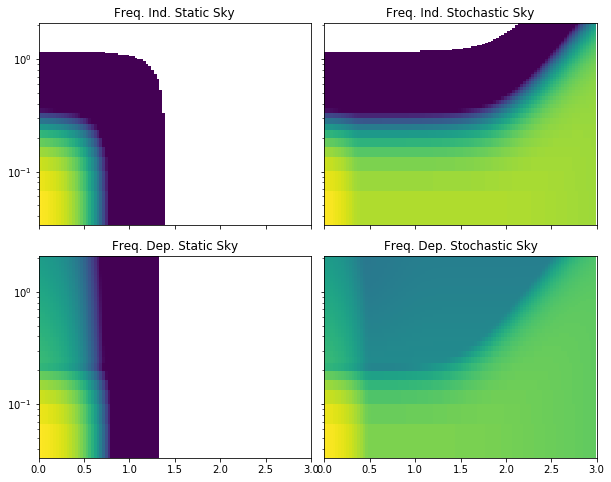

In [10]:
fig, ax = plt.subplots(2,2,sharex=True, sharey=True,figsize=(10,8), squeeze=False,subplot_kw={'yscale':'log'}, gridspec_kw={"hspace":0.15,"wspace":0.05})
tau = 30./8./150.
fmid = 165./150
fvec = np.arange(fmid - 4*tau, fmid+4*tau, 8*tau/128)[:128]
sigma = 0.20985
sigma_u = 40.
vmin = 1e-20


data, eta = fncs.update_data(tau = tau, sigma = sigma, sigma_u = sigma_u, fmid = fmid,
                             Smax = 1.0, Smin = 0.001, alpha = 4100., beta = 1.59, S0= None,
                             beam_frqind=True,
                             get_stochastic=False,
                             get_static = True, get_single_source=False,
                             ngp = True)


ax[0,0].imshow(data,origin='lower', norm=LogNorm(), extent = (np.log10(fncs.u.min()),np.log10(fncs.u.max()),eta.min(),eta.max()), vmin=vmin)
ax[0,0].set_title("Freq. Ind. Static Sky")

data, eta = fncs.update_data(tau = tau, sigma = sigma, sigma_u = sigma_u,fmid = fmid,
                             Smax = 1.0, Smin = 0.001, alpha = 4100., beta = 1.59, S0= None,
                             beam_frqind=True,
                             get_stochastic=True,
                             get_static = True, get_single_source=False,
                             ngp = True)


ax[0,1].imshow(data,origin='lower', norm=LogNorm(), extent = (np.log10(fncs.u.min()),np.log10(fncs.u.max()),eta.min(),eta.max()), vmin=vmin)
ax[0,1].set_title("Freq. Ind. Stochastic Sky")

data, eta = fncs.update_data(tau = tau, sigma = sigma, sigma_u = sigma_u,fmid = fmid,
                             Smax = 1.0, Smin = 0.001, alpha = 4100., beta = 1.59, S0= None,
                             beam_frqind=False,
                             get_stochastic=False,
                             get_static = True, get_single_source=False,
                             ngp = True)

print(data.max())
ax[1,0].imshow(data,origin='lower', norm=LogNorm(), extent = (np.log10(fncs.u.min()),np.log10(fncs.u.max()),eta.min(),eta.max()), vmin=vmin)
ax[1,0].set_title("Freq. Dep. Static Sky")

data, eta = fncs.update_data(tau = tau, sigma = sigma, sigma_u = sigma_u,fmid = fmid,
                             Smax = 1.0, Smin = 0.001, alpha = 4100., beta = 1.59, S0= None,
                             beam_frqind=False,
                             get_stochastic=True,
                             get_static = True, get_single_source=False,
                             ngp = True)

ax[1,1].imshow(data,origin='lower', norm=LogNorm(), extent = (np.log10(fncs.u.min()),np.log10(fncs.u.max()),eta.min(),eta.max()), vmin=vmin)
ax[1,1].set_title("Freq. Dep. Stochastic Sky")

fig.savefig("/home/steven/Desktop/figure_for_caastro.png")
# data, eta = fncs.update_data(tau = tau, sigma = sigma, sigma_u = sigma_u, fmid = fmid,
#                              Smax = 1.0, Smin = 0.001, alpha = 4100., beta = 1.59, S0= None,
#                              beam_frqind=True,
#                              get_stochastic=False,
#                              get_static = True, get_single_source=False,
#                              ngp = False)

# ax[1,0].imshow(data,origin='lower', norm=LogNorm(), extent = (np.log10(fncs.u.min()),np.log10(fncs.u.max()),eta.min(),eta.max()), vmin=vmin)

# data, eta = fncs.update_data(tau = tau, sigma = sigma, sigma_u = sigma_u, fmid = fmid,
#                              Smax = 1.0, Smin = 0.001, alpha = 4100., beta = 1.59, S0= None,
#                              beam_frqind=True,
#                              get_stochastic=True,
#                              get_static = False, get_single_source=False,
#                              ngp = False)

# ax[1,1].imshow(data,origin='lower', norm=LogNorm(), extent = (np.log10(fncs.u.min()),np.log10(fncs.u.max()),eta.min(),eta.max()), vmin=vmin)


In [9]:
data.max()

38314664.910614885

In [4]:
u0 = 0.05
kappa = 1.5

f0 = np.arange(1,180./150.,(180./150 - 1)/128)[:128]

model = foregrounds.CircularGaussianPowerLaw(source_counts=source_counts.MultiPowerLawSourceCounts(f0=f0,Smax0=1.,Smin0=1e-3,alpha=4100.,beta=[1.54],Sbreak=[0.006]), 
                                             beam_model=beam.CircularGaussian(nu0=150.),
                                             u =np.linspace(3,200.0,300),
                                             clustering_params={"u0":u0,"kappa":kappa})

In [5]:
cov_nu = model.fourier_vis_covariance_poisson(natural_units=True)

In [6]:
cov_nu.max()

<Quantity 452.4924930517193 Jy2 MHz2>

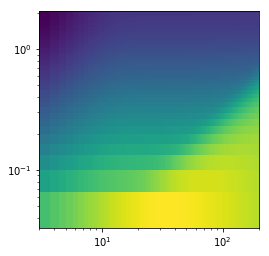

In [40]:
plt.imshow(cov_nu.value,origin='lower', norm=LogNorm(), extent = (model.u.min().value, model.u.max().value, model.eta.min().value, model.eta.max().value))
plt.xscale('log')
plt.yscale('log')

In [17]:
model.poisson_covariance.max()

<Quantity 388.302880445828 Jy2>

In [15]:
cov_eta = fncs.covu_to_coveta(model.poisson_covariance.value, model.f0)

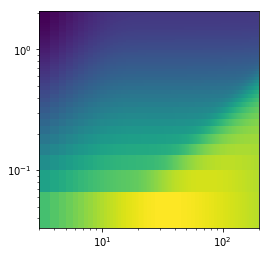

In [16]:
plt.imshow(cov_eta.T,origin='lower', norm=LogNorm(), extent = (model.u.min().value, model.u.max().value, model.eta.min().value, model.eta.max().value))
plt.xscale('log')
plt.yscale('log')

In [4]:
from scipy.misc import imresize

ImportError: cannot import name imresize

In [4]:
from scipy import misc

In [1]:
import scipy

In [2]:
scipy.__version__

'0.19.1'

In [21]:
from scipy.interpolate import RectBivariateSpline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
def coarsen(a, centres=None, n2=125):
    """
    Coarsen the square matrix a down to n2xn2.
    """
    n = len(a)
    if centres is None:
        dx = 1.
        centres = np.arange(n)
        
    else:
        dx = centres[1] - centres[0]
        
    db = float(dx)/(float(n2)/n)
    
    bvec = np.linspace(centres.min()- dx/2 + db/2, centres.max() + dx/2 - db/2, n2)
    spl = RectBivariateSpline(centres, centres, a, kx=1, ky=1)
    
    b = spl(bvec, bvec, grid=True)
    return b, bvec

In [85]:
centres = np.linspace(0,1,100)
a = np.exp(-np.outer(centres,centres))

b, new_centres = coarsen(a, centres,n2=70)

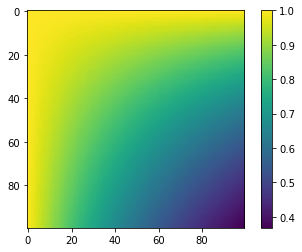

In [86]:
plt.imshow(a)
plt.colorbar()

In [87]:
new_centres

array([ 0.0021645 ,  0.01659452,  0.03102453,  0.04545455,  0.05988456,
        0.07431457,  0.08874459,  0.1031746 ,  0.11760462,  0.13203463,
        0.14646465,  0.16089466,  0.17532468,  0.18975469,  0.2041847 ,
        0.21861472,  0.23304473,  0.24747475,  0.26190476,  0.27633478,
        0.29076479,  0.30519481,  0.31962482,  0.33405483,  0.34848485,
        0.36291486,  0.37734488,  0.39177489,  0.40620491,  0.42063492,
        0.43506494,  0.44949495,  0.46392496,  0.47835498,  0.49278499,
        0.50721501,  0.52164502,  0.53607504,  0.55050505,  0.56493506,
        0.57936508,  0.59379509,  0.60822511,  0.62265512,  0.63708514,
        0.65151515,  0.66594517,  0.68037518,  0.69480519,  0.70923521,
        0.72366522,  0.73809524,  0.75252525,  0.76695527,  0.78138528,
        0.7958153 ,  0.81024531,  0.82467532,  0.83910534,  0.85353535,
        0.86796537,  0.88239538,  0.8968254 ,  0.91125541,  0.92568543,
        0.94011544,  0.95454545,  0.96897547,  0.98340548,  0.99

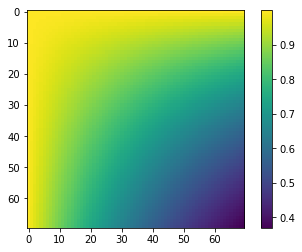

In [88]:
plt.imshow(b)
plt.colorbar()

In [64]:
n = 500
n2 = 125
X = np.arange(n)
a= np.outer(X,X)

da = 1.
db = float(n)/n2
bvec = np.linspace(0-da/2+db/2,n + da/2 - db/2, n2)

spl = RectBivariateSpline(np.arange(n), np.arange(n), a, kx=1, ky=1)
b = spl(bvec, bvec, grid=True)

In [65]:
np.sum(a)

15562562500

In [68]:
np.sum(b) * 16

15624999999.999998

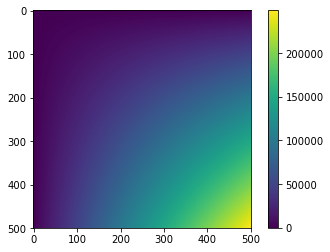

In [71]:
plt.imshow(a)
plt.colorbar()

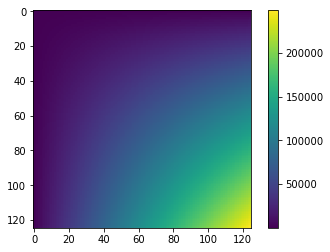

In [73]:
plt.imshow(b)
plt.colorbar()